In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
from torch import nn
from torch.autograd import Variable
from tqdm import tqdm_notebook
from torch.optim import Adam

from models import Unet
from datasets import ISBI2012Dataset
from trainers import Trainer

## Load Dataset
- ISBI2012 has only 30 image slices. the original authors authors used heavy image augmentation, a 1028 dimensional u-net, and a batch size of one.

In [2]:
transform = transforms.Compose([transforms.ToTensor()])


In [3]:
isbi = ISBI2012Dataset('train-volume.tif', 'train-labels.tif',
                       transforms=transform)

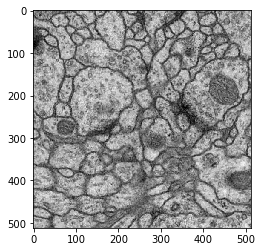

In [4]:
plt.imshow(isbi.train[0].reshape(512, 512), cmap='gray');

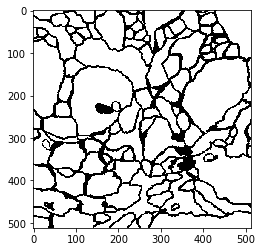

In [5]:
plt.imshow(isbi.targets[0].reshape(512, 512) , cmap='gray');

## Define Unet

In [6]:
unet = Unet()
unet.cuda();

## Train

In [7]:
trainer = Trainer(unet)

In [8]:
criterion = nn.BCEWithLogitsLoss()

In [9]:
optimizer = Adam(trainer.model.parameters(), lr=1e-3)
trainer.fit_generator(isbi, criterion, optimizer, 10);

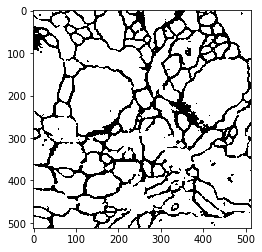

In [10]:
img, target = isbi[0]
y_pred = trainer.predict(img)
# threshold
thresh = 0.5
y_pred[y_pred >= thresh] = 1
y_pred[y_pred < thresh] = 0

plt.imshow(y_pred.reshape(512, 512), cmap='gray');

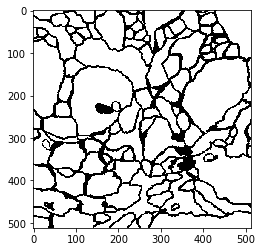

In [11]:
plt.imshow(target.numpy().reshape(512, 512), cmap='gray');

In [12]:
preds = trainer.predict_generator(isbi)